## Ontario House Sales - Data Analysis

**Information about the Data**:
This dataset (from kaggle.com) includes the listing prices for the sale of properties (mostly houses) in Ontario.
They are obtained for a short period of time in July 2016 and include the following fields:

- Price in dollars <br>
- Address of the property<br>
- Latitude and Longitude of the address <br>
- Area Name of the property 

**Tasks and questions**: 
- Which regions have more quantity of houses on sale? <br>
- Which regions have more valuable houses?


In [3]:
# importing the data analysis libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [4]:
%matplotlib inline

In [233]:
# Load the data
df = pd.read_csv('data/properties.csv')

In [234]:
# Checking the Dataset
df.head()

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25351 entries, 0 to 25350
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25351 non-null  int64  
 1   Address     25351 non-null  object 
 2   AreaName    24868 non-null  object 
 3   Price ($)   25351 non-null  int64  
 4   lat         25351 non-null  float64
 5   lng         25351 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ MB


In [235]:
df.columns

Index(['Unnamed: 0', 'Address', 'AreaName', 'Price ($)', 'lat', 'lng'], dtype='object')

In [236]:
# Changing some column names
df.rename(columns={'Unnamed: 0': 'ID', 'Price ($)': 'Price'}, inplace=True)
df.columns

Index(['ID', 'Address', 'AreaName', 'Price', 'lat', 'lng'], dtype='object')

In [237]:
df.shape

(25351, 6)

In [238]:
df.describe()

,ID,Price,lat,lng
count,25351.000000,2.535100e+04,25351.000000,25351.000000
mean,42878.517613,5.645438e+05,37.326614,-85.218379
std,31456.247046,8.475962e+05,82.858347,73.093572
min,0.000000,0.000000e+00,-999.000000,-999.000000
25%,19940.000000,2.199000e+05,43.401087,-80.308159
50%,34037.000000,3.719000e+05,43.715977,-79.503342
75%,61501.500000,6.199000e+05,44.466711,-79.107326
max,124929.000000,3.250000e+07,53.851017,1.074519


In [239]:
# Filtering out data with invalid Latitude and Longitude value of -999
df = df[(df['lat']!=-999) & (df['lng']!=-999)]

In [240]:
df.shape

(25190, 6)

In [241]:
# Filtering out outliers i.e Price below $100000 and above $10000000
#df = df[(df['Price'] >= 100000) & (df['Price'] <= 10000000)]

In [242]:
df.shape

(25190, 6)

In [243]:
df.describe()

,ID,Price,lat,lng
count,25190.000000,2.519000e+04,25190.000000,25190.000000
mean,42875.106471,5.653961e+05,43.950218,-79.378012
std,31451.088218,8.497320e+05,1.012079,2.382423
min,0.000000,0.000000e+00,36.160065,-122.553154
25%,19951.500000,2.199000e+05,43.409222,-80.284736
50%,34047.500000,3.720000e+05,43.718151,-79.495723
75%,61488.750000,6.199000e+05,44.478209,-79.099981
max,124929.000000,3.250000e+07,53.851017,1.074519


## Exploratory Data Analysis

** Which areas have most quantity of houses on sale? **

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Downtown'),
  Text(1, 0, 'Mississauga'),
  Text(2, 0, 'Waterloo'),
  Text(3, 0, 'Niagara Falls'),
  Text(4, 0, 'Richmond Hill'),
  Text(5, 0, 'Burlington'),
  Text(6, 0, 'Willowdale'),
  Text(7, 0, 'Brampton'),
  Text(8, 0, 'Oakville'),
  Text(9, 0, 'Midtown Toronto'),
  Text(10, 0, 'Huntsville'),
  Text(11, 0, 'Orléans'),
  Text(12, 0, 'Kingston'),
  Text(13, 0, 'Brantford'),
  Text(14, 0, 'Peterborough'),
  Text(15, 0, 'Kanata'),
  Text(16, 0, 'Belleville'),
  Text(17, 0, 'Ottawa'),
  Text(18, 0, 'Windsor'),
  Text(19, 0, 'Perth')])

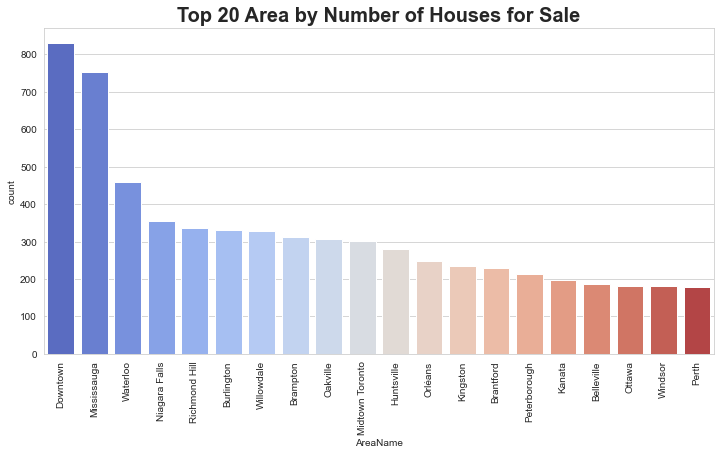

In [245]:
plt.figure(figsize=(12,6))
sns.countplot(x='AreaName', data=df, order=df['AreaName'].value_counts().iloc[:20].index, palette = 'coolwarm')
plt.title('Top 20 Area by Number of Houses for Sale',fontweight='bold',fontsize=20)
plt.xticks(rotation=90)

Conclusion : Downtown is the area with most number of houses on sale

** Which area has highest priced houses ? **

In [255]:
#Mean Price by Area
df_mean = df.groupby('AreaName').mean().sort_values(by='Price',ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bridle Path'),
  Text(1, 0, 'Appleby'),
  Text(2, 0, 'Lytton Park'),
  Text(3, 0, 'York Mills'),
  Text(4, 0, 'Tempo'),
  Text(5, 0, 'Edenbridge - Humber Valley'),
  Text(6, 0, 'St. Andrew - Windfields'),
  Text(7, 0, 'Armour Heights'),
  Text(8, 0, 'Pelee Island'),
  Text(9, 0, 'Crerar'),
  Text(10, 0, 'Clarington'),
  Text(11, 0, 'East Bayfront'),
  Text(12, 0, 'Chestnut Hills'),
  Text(13, 0, 'Windfields'),
  Text(14, 0, 'Florida'),
  Text(15, 0, 'Caribou Park'),
  Text(16, 0, 'Pioneer Tower East'),
  Text(17, 0, 'Thorncrest Village'),
  Text(18, 0, 'West Queen West'),
  Text(19, 0, 'Rural Oshawa')])

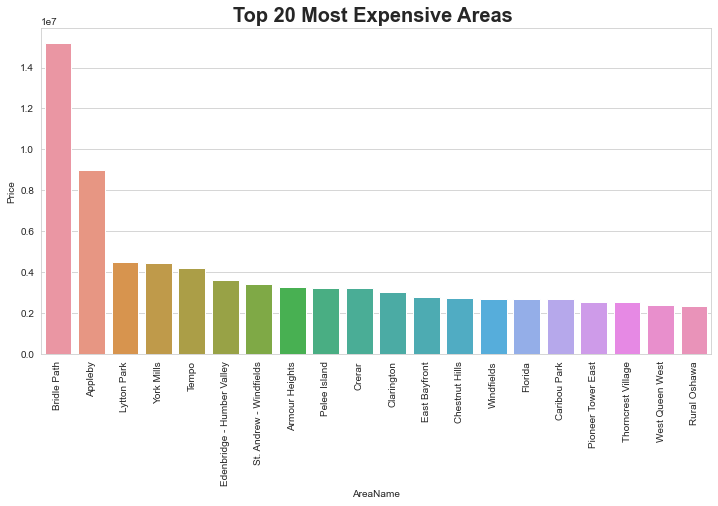

In [254]:
plt.figure(figsize=(12,6))
sns.barplot(x='AreaName', y='Price',data=df_mean.reset_index(), order = df_mean.iloc[:20].index)
plt.title('Top 20 Most Expensive Areas ',fontweight='bold',fontsize=20)
plt.xticks(rotation=90)

The highest average price of houses is in Bridle Path, Toronto.

** Most Expensive Houses by Area ? **

In [265]:
top20_price_list=df['Price'].value_counts().sort_index(ascending = False).iloc[:19].index

In [268]:
top20_price_list

Int64Index([32500000, 26800000, 23200000, 18800000, 16000000, 15300000,
            15000000, 14888000, 14880000, 14800000, 14500000, 14395000,
            13000000, 12900000, 10995000, 10900000, 10800000, 10799000,
            10500000],
           dtype='int64')

In [272]:
price20_df = df[df['Price'].isin(top20_price_list)].sort_values(by='Price',ascending=False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Greenbelt'),
  Text(1, 0, 'Bridle Path'),
  Text(2, 0, 'Barrie'),
  Text(3, 0, 'Caledon'),
  Text(4, 0, 'Woodbridge'),
  Text(5, 0, 'Midtown Toronto'),
  Text(6, 0, 'York Mills'),
  Text(7, 0, 'Downtown'),
  Text(8, 0, 'Belleville'),
  Text(9, 0, 'Brantford'),
  Text(10, 0, 'Mississauga'),
  Text(11, 0, 'Waterloo'),
  Text(12, 0, 'Downsview')])

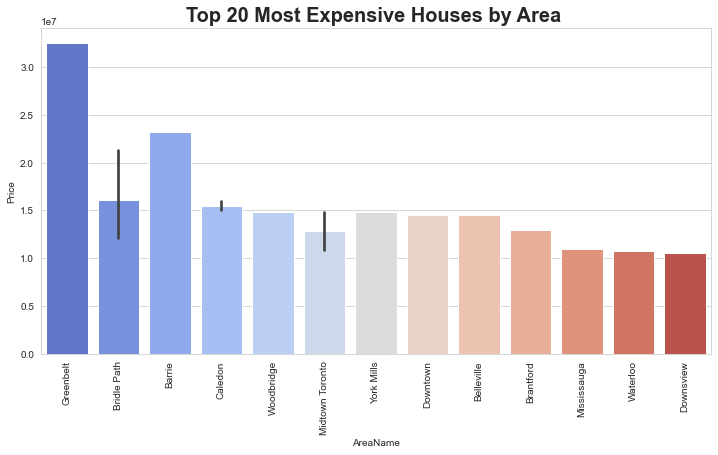

In [267]:
plt.figure(figsize=(12,6))
sns.barplot(x='AreaName',y='Price' ,data=price20_df, palette = 'coolwarm',)
plt.title('Top 20 Most Expensive Houses by Area ',fontweight='bold',fontsize=20)
plt.xticks(rotation=90)

Conclusion : The highest priced house is in Greenbelt area.